In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import seaborn as sns
sns.set()

In [2]:
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables

## Spherical harmonics
$Y^m_n(\theta,\phi) = \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}}
  e^{i m \theta} P^m_n(\cos(\phi))$

The following codes plots the spherical harmonics for the provided values of l and m

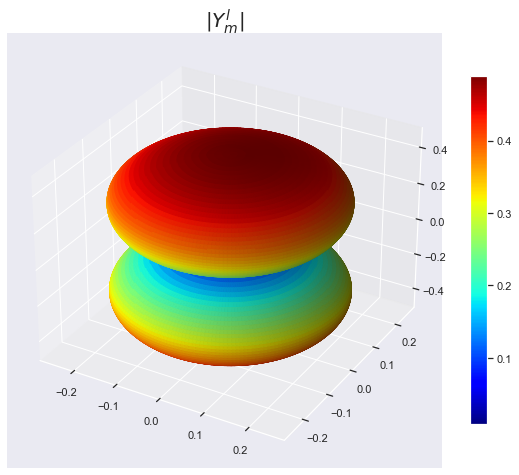

In [5]:
l = 1    #degree
m = 0   #order
 
R = np.abs(sp.sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
ax.set_title(r'$|Y^l_ m|$', fontsize=20)

m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
fig.colorbar(m, shrink=0.8);


l =3
m =1


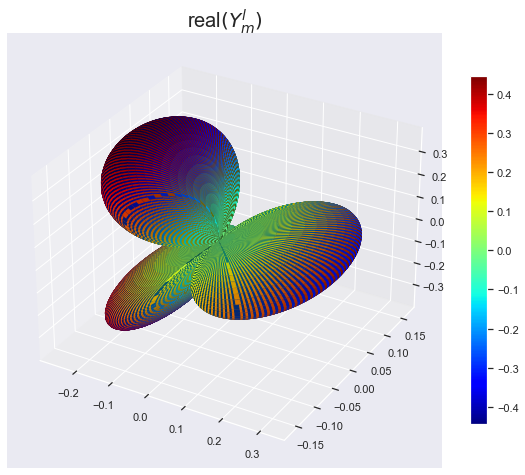

In [4]:
l = int(input('l ='))     #degree
m = int(input('m ='))      # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
R = sp.sph_harm(m, l, PHI, THETA).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

#As R has negative values, we'll use an instance of Normalize
#see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
norm = colors.Normalize()
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^l_ m)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);